In [2]:
# Fashion: By fabrics
# Load Dependencies
from bs4 import BeautifulSoup
import requests 
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# https://www.words-to-use.com/words/clothing/ scraping
page = requests.get('https://www.words-to-use.com/words/clothing/')
data = page.text
soup = BeautifulSoup(data)

/Users/kevinice/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/kevinice/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
text = soup.find_all(id="fabrics")

In [5]:
text = text[0].get_text()

In [6]:
fabricslist = text.split('\n')
fabrics = filter(None,fabricslist)
fabrics = [re.sub(' ','+',item) for item in fabrics]
fabrics = [re.sub('-','+',item) for item in fabrics]

In [7]:
fabrics

[u'angora',
 u'boucle',
 u'canvas',
 u'chambray',
 u'chiffon',
 u'chino',
 u'corduroy',
 u'cotton',
 u'damask',
 u'demin',
 u'denim',
 u'elastane',
 u'eyelet',
 u'faille',
 u'mesh',
 u'mohair',
 u'moleskin',
 u'nylon',
 u'organza',
 u'oxford',
 u'percaline',
 u'polyester',
 u'rayon',
 u'satin',
 u'saxony',
 u'seersucker',
 u'shearling',
 u'silk',
 u'flannel',
 u'flax',
 u'full+grain+leather',
 u'gabardine',
 u'gingham',
 u'grosgrain',
 u'herringbone',
 u'houndstooth',
 u'jacquard',
 u'jean',
 u'jersey',
 u'lace',
 u'leather',
 u'madras',
 u'suede',
 u'taffeta',
 u'ticking',
 u'top+grain+leather',
 u'tricot',
 u'tulle',
 u'tweed',
 u'twill',
 u'velour',
 u'velvet',
 u'viscose',
 u'worcester']

In [8]:
import pandas as pd
df = pd.read_csv('fiction.txt',header=None,engine='python',delimiter='\t')
for i in range(1,len(df.columns)-2):
    curr = i
    a = df.iloc[0,i].split(',')
    df.iloc[0,i] = a[1]
    if a[0] == '1800':
        start = i
data = pd.DataFrame(df.iloc[0,start:len(df.columns)-1])
data = data.reset_index(drop=True)
data = pd.concat([pd.Series(range(1800,2009)),data],axis=1)

In [9]:
#Created the URL and will change the word substitute to desired word
url = 'https://books.google.com/ngrams/graph?content=substitute&year_start=1800&year_end=2008&corpus=16&smoothing=0&share=&direct_url=t1%3B%2Csubstitute%3B%2Cc0'
for fabric in fabrics:
    print(fabric)
    url1 = re.sub('substitute',fabric,url)
    page = requests.get(url1)
    text = page.text
    soup = BeautifulSoup(text)
    test = soup.find_all(type="text/javascript")
    test = test[4].get_text()
    numbers = test[test.find(": [")+3:test.find("]")]
    temp = numbers.split(',')
    if len(temp) < 100: 
        data[fabric] = 0
        continue
    temp = map(float,temp)
    temp = pd.Series(temp)
    data = pd.concat([data,temp],axis=1)
    time.sleep(3)

angora
boucle
canvas
chambray
chiffon
chino
corduroy
cotton
damask
demin
denim
elastane
eyelet
faille
mesh
mohair
moleskin
nylon
organza
oxford
percaline
polyester
rayon
satin
saxony
seersucker
shearling
silk
flannel
flax
full+grain+leather
gabardine
gingham
grosgrain
herringbone
houndstooth
jacquard
jean
jersey
lace
leather
madras
suede
taffeta
ticking
top+grain+leather
tricot
tulle
tweed
twill
velour
velvet
viscose
worcester


In [10]:
column_names = ["Year"] + ["Counts"] + fabrics
data1 = data
data1.columns = column_names

In [11]:
data1 = data1[:-1]
data1.to_csv('fictionfabrics%.csv',index=False)
counts = data1
for i in range(2,len(counts.columns)-1):
    counts.iloc[:,i] = (counts.iloc[:,i] * counts.iloc[:,1].astype(float))
counts.fillna(0)
counts.to_csv('fictionfabricsc.csv',index=False)

/Users/kevinice/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/Users/kevinice/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


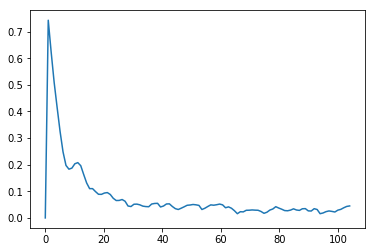

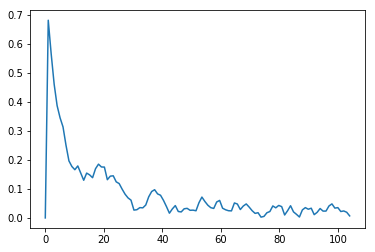

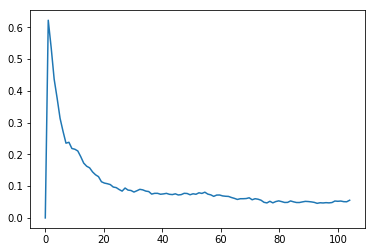

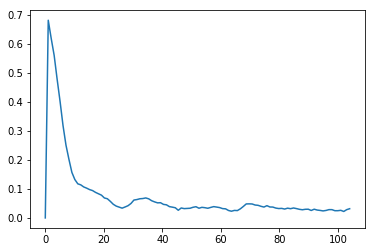

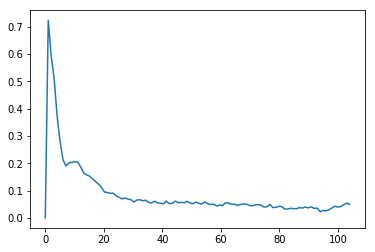

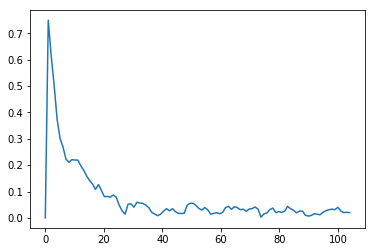

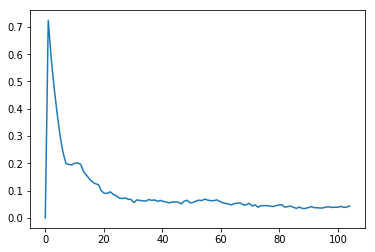

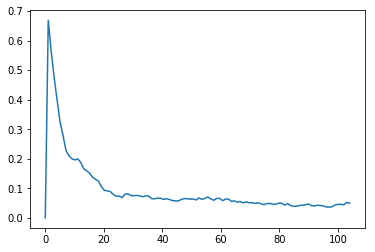

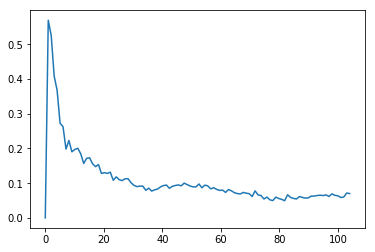

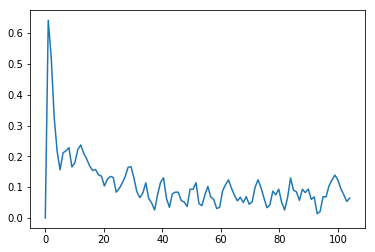

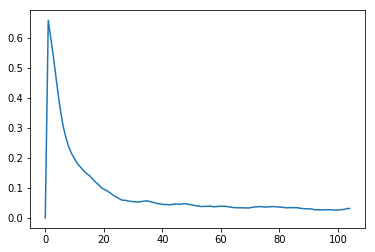

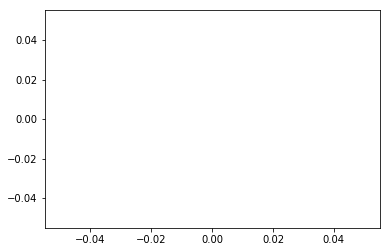

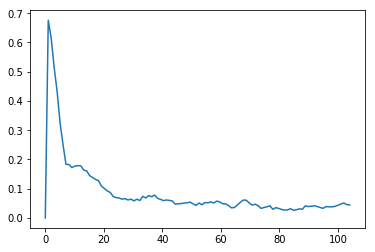

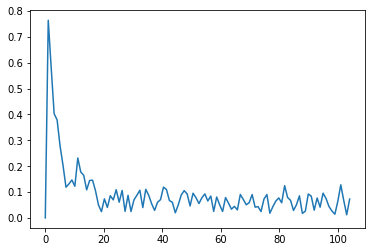

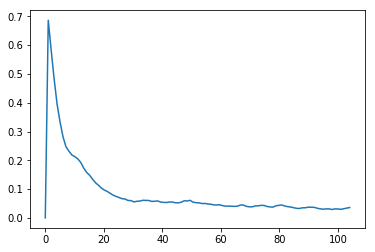

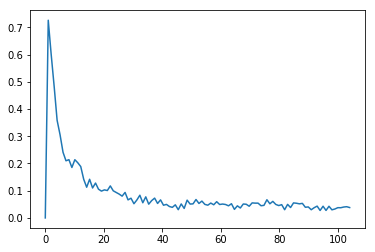

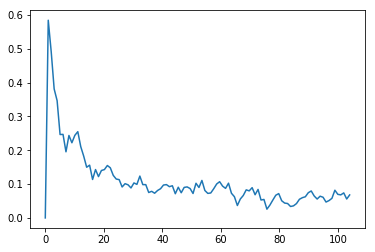

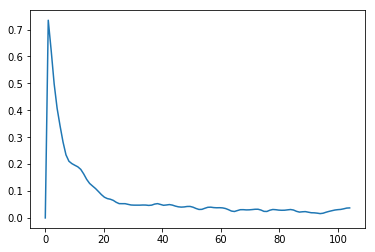

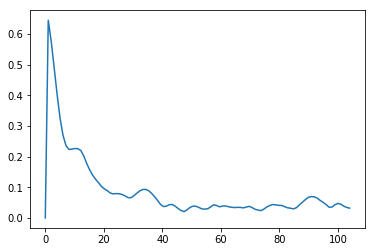

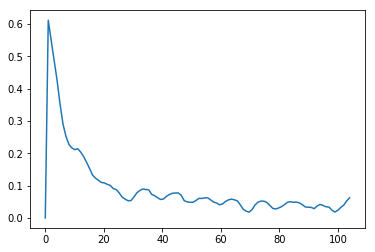

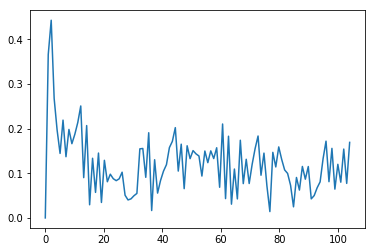

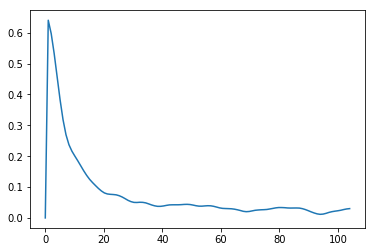

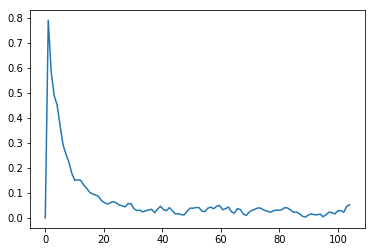

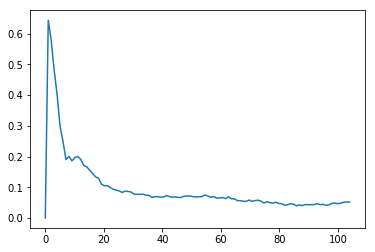

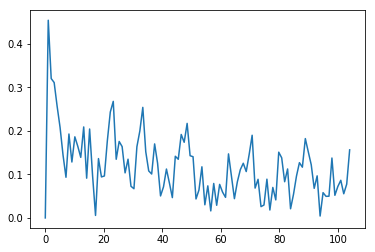

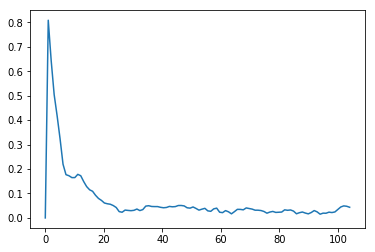

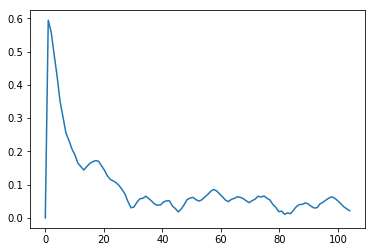

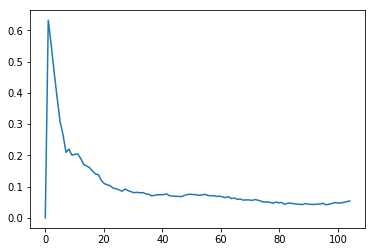

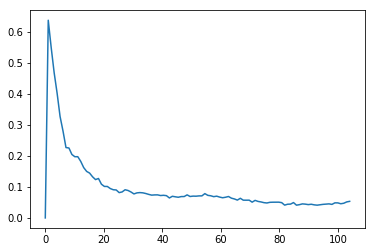

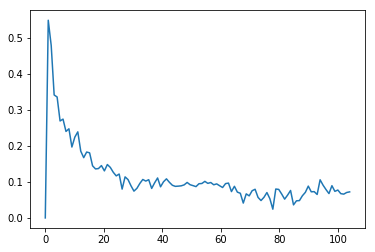

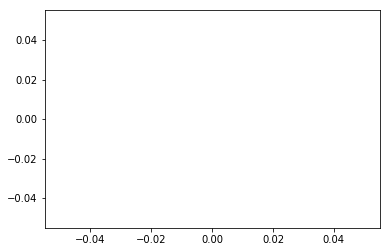

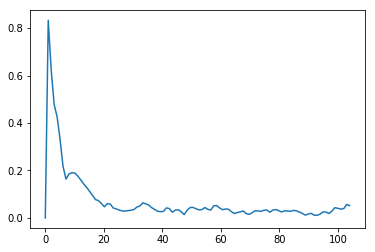

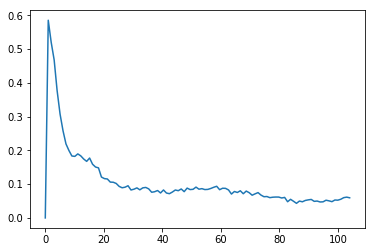

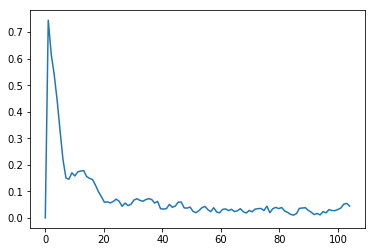

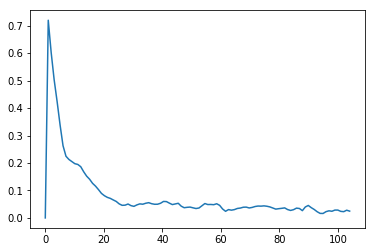

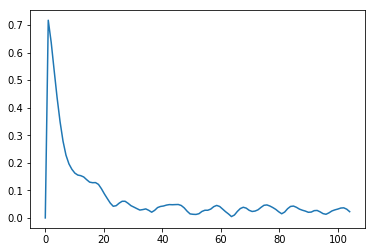

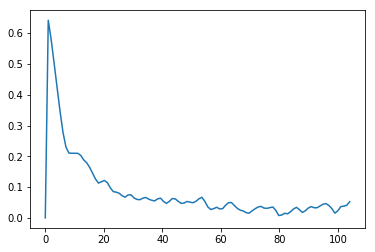

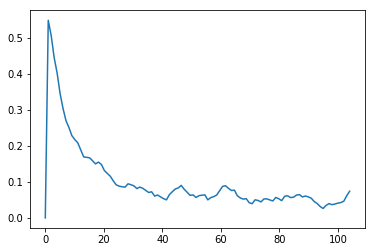

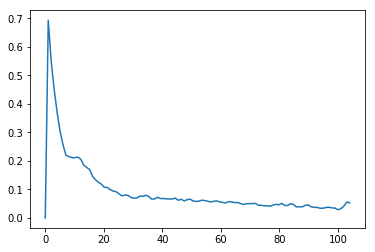

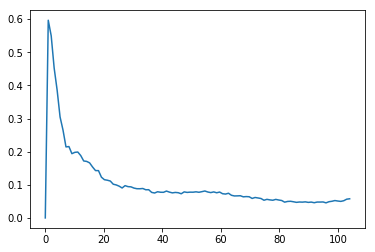

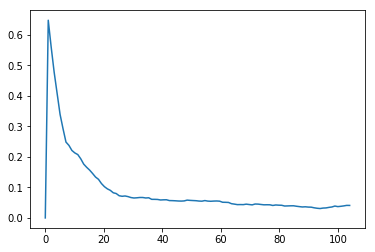

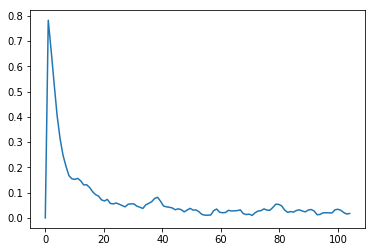

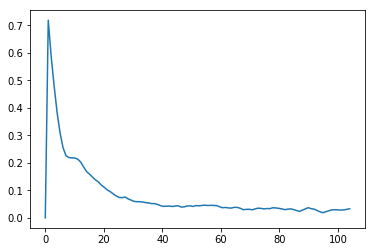

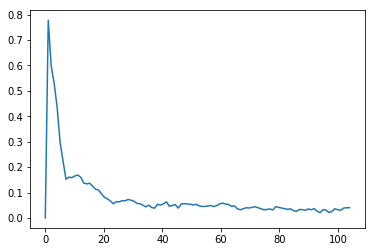

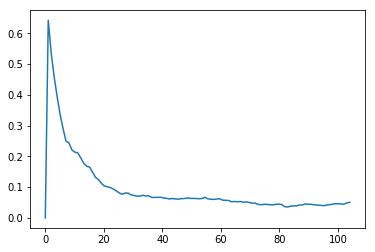

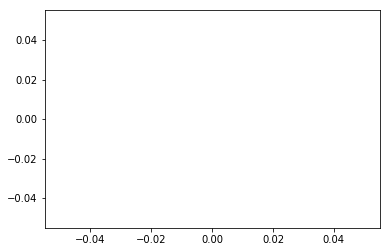

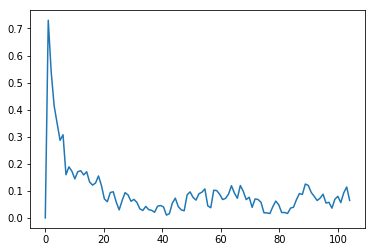

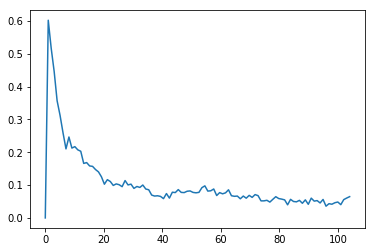

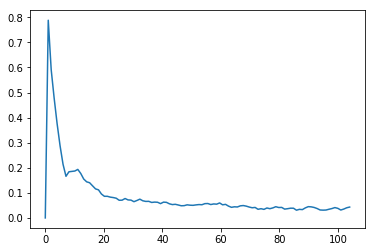

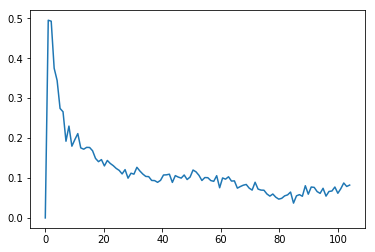

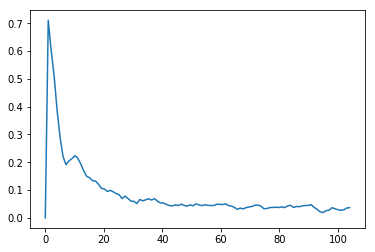

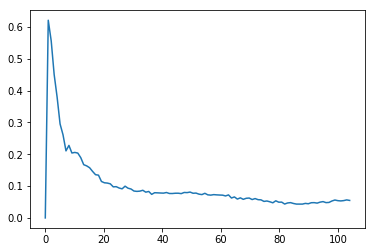

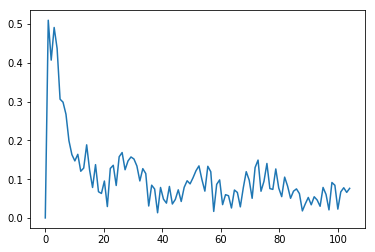

In [85]:
len(a)

208

1

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
180    1
181    1
182    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
196    1
197    1
198    1
199    1
200    1
201    1
202    1
203    1
204    1
205    1
206    1
207    1
208    1
209    1
Name: boucle, Length: 210, dtype: int64